### Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
airline = pd.read_excel('EastWestAirlines.xlsx')
airline.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [3]:
airlines = airline.drop('ID#', axis=1)

In [4]:
airlines.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
5,16420,0,1,1,1,0,0,0,0,6942,0
6,84914,0,3,1,1,27482,25,0,0,6994,0
7,20856,0,1,1,1,5250,4,250,1,6938,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1


In [5]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airlines.iloc[:,:10])

In [7]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


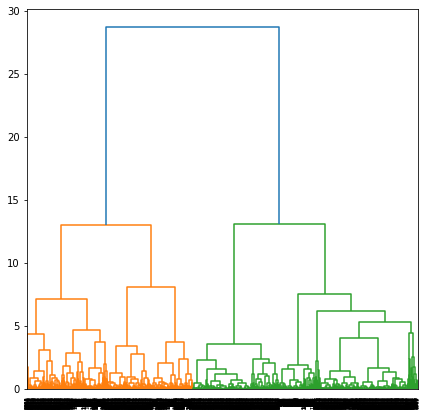

In [8]:
# create dendrogram
fig = plt.figure(figsize=(7,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [9]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [10]:
X = df_norm.iloc[:, :10]

In [11]:
X.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [12]:
y = df_norm.iloc[:,10:]

In [13]:
y.head()

""
0
1
2
3
4


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)

In [15]:
# save clusters for chart
y_hc = hc.fit_predict(X)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [16]:
X['h_clusterid'] = hc.labels_

<ipython-input-16-6f914fb7654a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['h_clusterid'] = hc.labels_


In [17]:
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,2
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,2
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,4
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,2


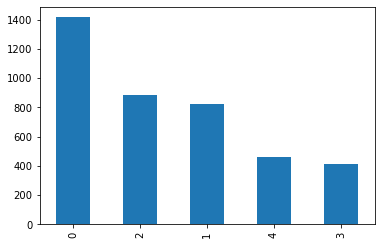

In [18]:
X['h_clusterid'].value_counts().plot.bar()

In [19]:
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,4
3997,2


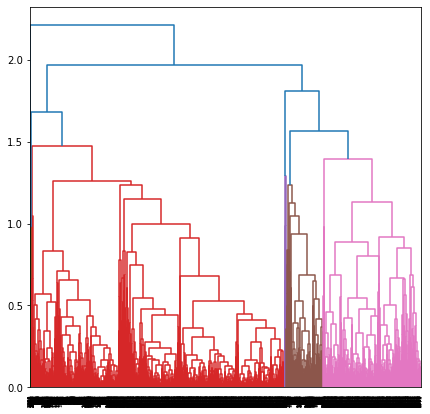

In [20]:
# create dendrogram
fig = plt.figure(figsize=(7,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

### K-means Clustering

In [21]:
from sklearn.cluster import KMeans

In [22]:
ewairline = pd.read_excel('EastWestAirlines.xlsx')
ewairline.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [23]:
al = ewairline.drop('ID#', axis=1)

In [24]:
al.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
5,16420,0,1,1,1,0,0,0,0,6942,0
6,84914,0,3,1,1,27482,25,0,0,6994,0
7,20856,0,1,1,1,5250,4,250,1,6938,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1


In [26]:
# Normalize the function

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(al.iloc[:,1:])

#### PCA of standardized data
Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning

In [28]:
# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(scaled_airline_df)

In [29]:
# eigenvalues..

print(pca_std.singular_values_)

[110.08042503  83.07493881  64.25959065  63.48697155  61.8545978
  59.67075971  53.85502346  38.28046739]


In [30]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[30.30182539 17.25792813 10.32581893 10.07900864  9.56737002  8.90372484
  7.25272206  3.66440156]


In [31]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.30182539, 47.55975352, 57.88557245, 67.9645811 , 77.53195111,
       86.43567596, 93.68839802, 97.35279958])

by applying PCA on standardized data with 95% variance it gives 8 PCA components.

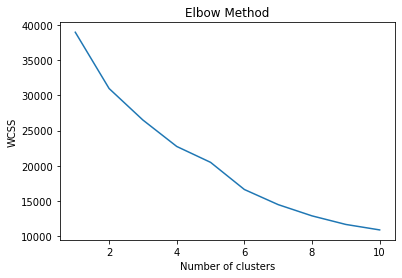

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_std_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

we can decide which cluster to use by silhouette_score method too

In [34]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

C:\Users\gkhat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 2 The average silhouette_score is : 0.3360392671998706


C:\Users\gkhat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 3 The average silhouette_score is : 0.3298762482805158


C:\Users\gkhat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 4 The average silhouette_score is : 0.32747125666217763


C:\Users\gkhat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 5 The average silhouette_score is : 0.34625955313133666


C:\Users\gkhat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 6 The average silhouette_score is : 0.3543151359089232


C:\Users\gkhat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 7 The average silhouette_score is : 0.31701222915220956


C:\Users\gkhat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 8 The average silhouette_score is : 0.27940401375247215


C:\Users\gkhat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 9 The average silhouette_score is : 0.29907929417342516


By taking standardize data pca it gives number of cluster =6 with silhoette score = 0.36
Best score alwways close to +1.

In [35]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model1 = KMeans(n_clusters=6, random_state=0,n_jobs=-1)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape

C:\Users\gkhat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


(3999,)

In [36]:
# these are nothing but cluster labels...

y_predict1

array([1, 1, 1, ..., 2, 1, 1])

In [37]:
# y_predict & cluster labels both are same use any one of them to avoid further confusion.

model1.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [38]:
# cluster centres associated with each lables

model1.cluster_centers_

array([[ 9.76709517e-01,  1.65608758e+00, -2.99073159e+00,
         1.18195215e+00,  5.40076245e+00, -1.57179987e+00,
         9.47241172e-01, -5.69786248e-02],
       [-1.01841393e+00,  2.36250902e-01,  1.34170895e-02,
         9.46697494e-02, -9.32166130e-02,  8.54883354e-02,
        -1.18415734e-02, -3.54108270e-03],
       [ 1.50912682e+00, -1.05085060e+00, -1.93865494e-01,
        -1.62642318e-01, -1.66630400e-01, -2.06922771e-01,
        -3.94822600e-02, -1.22409829e-02],
       [ 4.04659658e+00,  4.02065491e+00,  1.89235177e-01,
         2.62456441e-01, -7.60283026e-01,  3.96632110e-01,
         2.23098528e-01,  1.47521493e-01],
       [ 1.08672264e-01,  1.05360657e+00,  5.04027253e+00,
        -6.62966082e+00,  3.45135750e+00, -3.88897336e-01,
         9.08366542e-02,  2.53375143e-01],
       [ 4.23668846e+00, -3.68329007e+00,  9.12548529e+00,
         9.00408960e+00,  5.15933088e+00,  5.93769241e+00,
        -1.06104796e+00, -3.66863625e-01]])

In [39]:

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model1.inertia_

16653.134135442066

In [40]:
model1.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'n_jobs': -1,
 'precompute_distances': 'deprecated',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

#### Visualizing the clusters formed

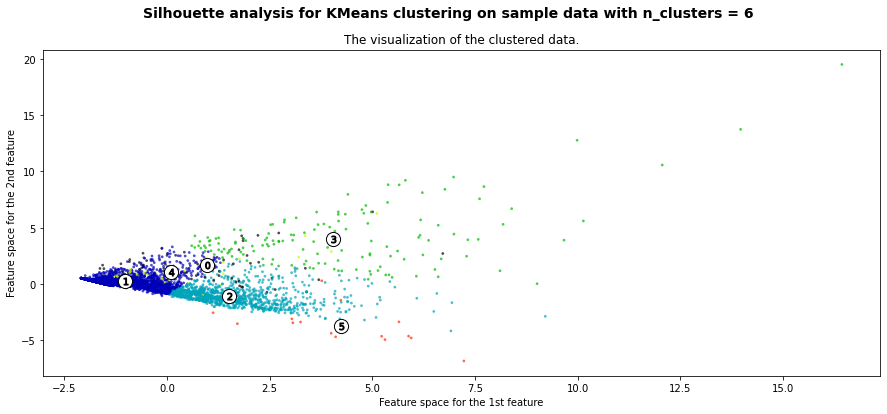

In [48]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15,6)


import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax1.scatter(pca_std_df[:, 0], pca_std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax1.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax1.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax1.set_title(label ="The visualization of the clustered data.")
ax1.set_xlabel("Feature space for the 1st feature")
ax1.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

plt.show()

#### Putting Cluster lables into original dataset 

In [49]:
# Creating dataframe of cluster lables..

model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [50]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([ewairline.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


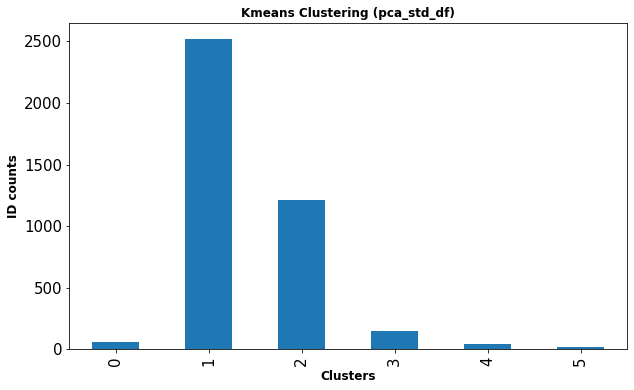

In [52]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()